In [1]:
%run '/home/gvolta/Desktop/Function/Useful/Def.ipynb'

Initialization done, Notebook was last run on: 09/05/2019


In [2]:
import lax 
from lax.lichens import sciencerun1
from lax.lichens import sciencerun0

from pax import units, configuration
pax_config = configuration.load_configuration('XENON1T')['DEFAULT']
tpc_height = pax_config['tpc_length']
tpc_radius = pax_config['tpc_radius']

import hax
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         main_data_paths= ['/dali/lgrandi/xenon1t/processed/pax_v6.10.1'], 
         minitree_paths = ['/dali/lgrandi/giovo/minitrees/pax_v6.10.1',
                           '/dali/lgrandi/xenon1t/minitrees/pax_v6.10.1'],
         make_minitrees = False)

%matplotlib inline

# Reading of data

In [3]:
path = '/dali/lgrandi/giovo/minitrees/pax_v6.10.1/'
dataNG_post18836_1 = pd.read_pickle(path+'SR2_dataNG_post18836_DAQandFlash_1_pax6.10.1.pkl')
dataNG_post18836_2 = pd.read_pickle(path+'SR2_dataNG_post18836_DAQandFlash_2_pax6.10.1.pkl')
dataNG_post18836_3 = pd.read_pickle(path+'SR2_dataNG_post18836_DAQandFlash_3_pax6.10.1.pkl')

In [4]:
for i in range(len(dataNG_post18836_1.columns)-1): print(dataNG_post18836_1.columns[i])

alt_s1_interaction_drift_time
alt_s1_interaction_z
alt_s1_tight_coincidence
alt_s2_interaction_s2_range_50p_area
alt_s2_interaction_s2_range_80p_area
alt_s2_interaction_x
alt_s2_interaction_y
alt_s2_interaction_z
cs1
cs1_nn
cs1_nn_tf
cs1_no_field_corr_nn
cs1_no_field_corr_nn_tf
cs1_no_field_corr_tpf
cs1_tpf
cs2
cs2_bottom
cs2_bottom_nn
cs2_bottom_nn_tf
cs2_bottom_tpf
cs2_nn
cs2_nn_tf
cs2_top
cs2_top_nn
cs2_top_nn_tf
cs2_top_tpf
cs2_tpf
drift_time
event_duration
event_number
event_time
flashing_PMT
flashing_time
flashing_width
inside_flash
largest_coincidence
largest_other_s1
largest_other_s2
largest_other_s2_delay_main_s1
largest_other_s2_delay_main_s2
largest_other_s2_pattern_fit
largest_s2_before_main_s2_area
largest_unknown
largest_veto
nearest_1e5pe_event
nearest_1e6pe_event
nearest_3e5pe_event
nearest_busy
nearest_busy_off
nearest_busy_on
nearest_event
nearest_flash
nearest_hev
nearest_hev_off
nearest_hev_on
nearest_muon_veto_trigger
nearest_s2_area
next_1e5pe_event
next_1e6pe_eve

# Radius

In [4]:
dataNG_post18836_1['Cut_r_3d_nn_tf'] = dataNG_post18836_1['r_3d_nn_tf'] < 44
dataNG_post18836_2['Cut_r_3d_nn_tf'] = dataNG_post18836_2['r_3d_nn_tf'] < 44
dataNG_post18836_3['Cut_r_3d_nn_tf'] = dataNG_post18836_3['r_3d_nn_tf'] < 44

In [5]:
dataNG_post18836_1 = hax.cuts.selection(dataNG_post18836_1, dataNG_post18836_1['Cut_r_3d_nn_tf'] == True)
dataNG_post18836_2 = hax.cuts.selection(dataNG_post18836_2, dataNG_post18836_2['Cut_r_3d_nn_tf'] == True)
dataNG_post18836_3 = hax.cuts.selection(dataNG_post18836_3, dataNG_post18836_3['Cut_r_3d_nn_tf'] == True)

Unnamed selection: 527549 rows removed (53.20% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


Unnamed selection: 650168 rows removed (54.14% passed)
Unnamed selection: 1202359 rows removed (54.75% passed)


# Height

In [6]:
dataNG_post18836_1['Cut_z_3d_nn_tf'] = (dataNG_post18836_1['z_3d_nn_tf'] > -90) & (dataNG_post18836_1['z_3d_nn_tf'] < -10)
dataNG_post18836_2['Cut_z_3d_nn_tf'] = (dataNG_post18836_2['z_3d_nn_tf'] > -90) & (dataNG_post18836_2['z_3d_nn_tf'] < -10)
dataNG_post18836_3['Cut_z_3d_nn_tf'] = (dataNG_post18836_3['z_3d_nn_tf'] > -90) & (dataNG_post18836_3['z_3d_nn_tf'] < -10)

In [7]:
dataNG_post18836_1 = hax.cuts.selection(dataNG_post18836_1, dataNG_post18836_1['Cut_z_3d_nn_tf'] == True)
dataNG_post18836_2 = hax.cuts.selection(dataNG_post18836_2, dataNG_post18836_2['Cut_z_3d_nn_tf'] == True)
dataNG_post18836_3 = hax.cuts.selection(dataNG_post18836_3, dataNG_post18836_3['Cut_z_3d_nn_tf'] == True)

Unnamed selection: 220540 rows removed (63.23% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


Unnamed selection: 259201 rows removed (66.23% passed)
Unnamed selection: 482169 rows removed (66.86% passed)


# Saving date

In [8]:
Data = [dataNG_post18836_1, dataNG_post18836_2, dataNG_post18836_3]
dataNG_post18836 = pd.concat(Data, ignore_index=True)

In [10]:
for i in range(len(dataNG_post18836.run_number)-1):
    if dataNG_post18836.run_number[i] != dataNG_post18836.run_number[i+1]:
        print(dataNG_post18836.run_number[i])

20634
20635
20636
20637
20639
20640
20641
20642
20643
20644
20645
20646
20647
20648
20649
20650
20651
20652
20653
20654
20655
20656
20657
20658
20659
20660
20661
20663
20664
20665
20674
20675
20676
20677
20678
20679
20680
20681
20682
20683
20684
20685
20686
20687
20688
20689
20690
20692
20693
20705
20706
20707
20708
20709
20710
20712
20713
20714
23910
23911
23912
23913
23915
23916
23917
23918
23919
23920
23921
23922
23923
23924
23925
23926
23927
23928
23929
23930
23942
23943
23944
23945
23946
23947
23948
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963


In [11]:
for i in range(len(dataNG_post18836.columns)-1): print(dataNG_post18836.columns[i])

alt_s1_interaction_drift_time
alt_s1_interaction_z
alt_s1_tight_coincidence
alt_s2_interaction_s2_range_50p_area
alt_s2_interaction_s2_range_80p_area
alt_s2_interaction_x
alt_s2_interaction_y
alt_s2_interaction_z
cs1
cs1_nn
cs1_nn_tf
cs1_no_field_corr_nn
cs1_no_field_corr_nn_tf
cs1_no_field_corr_tpf
cs1_tpf
cs2
cs2_bottom
cs2_bottom_nn
cs2_bottom_nn_tf
cs2_bottom_tpf
cs2_nn
cs2_nn_tf
cs2_top
cs2_top_nn
cs2_top_nn_tf
cs2_top_tpf
cs2_tpf
drift_time
event_duration
event_number
event_time
flashing_PMT
flashing_time
flashing_width
inside_flash
largest_coincidence
largest_other_s1
largest_other_s2
largest_other_s2_delay_main_s1
largest_other_s2_delay_main_s2
largest_other_s2_pattern_fit
largest_s2_before_main_s2_area
largest_unknown
largest_veto
nearest_1e5pe_event
nearest_1e6pe_event
nearest_3e5pe_event
nearest_busy
nearest_busy_off
nearest_busy_on
nearest_event
nearest_flash
nearest_hev
nearest_hev_off
nearest_hev_on
nearest_muon_veto_trigger
nearest_s2_area
next_1e5pe_event
next_1e6pe_eve

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


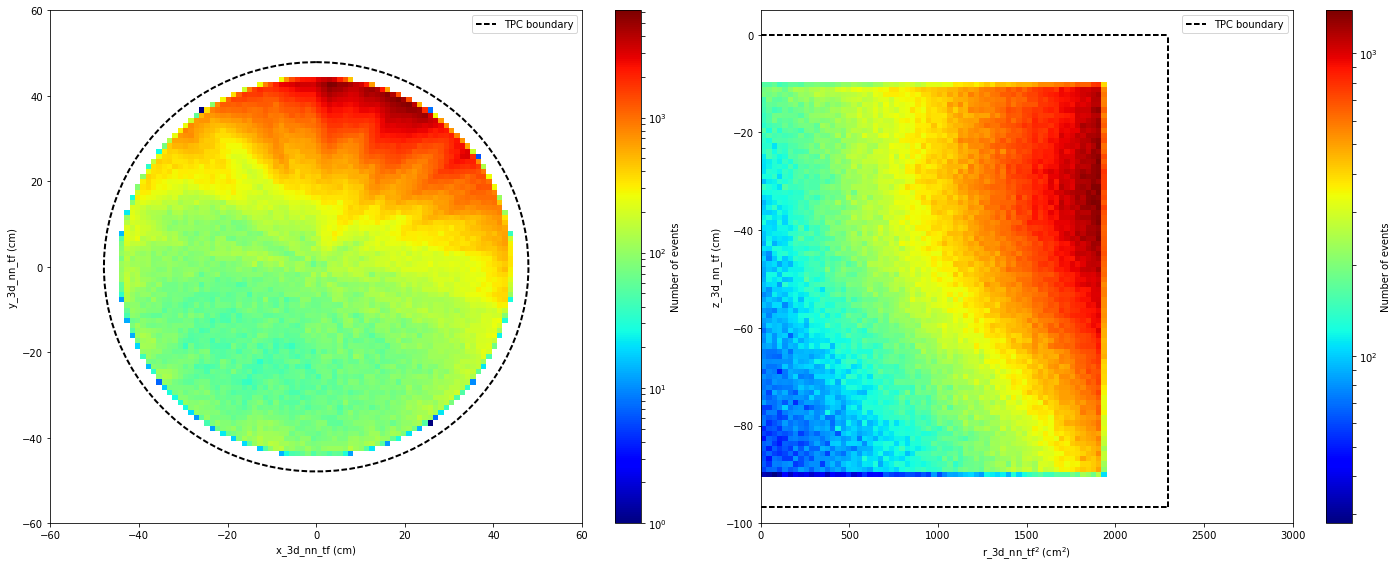

In [12]:
data_distribution(dataNG_post18836, 'x_3d_nn_tf', 'y_3d_nn_tf', 'z_3d_nn_tf', 'r_3d_nn_tf', bins=[100,100])

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


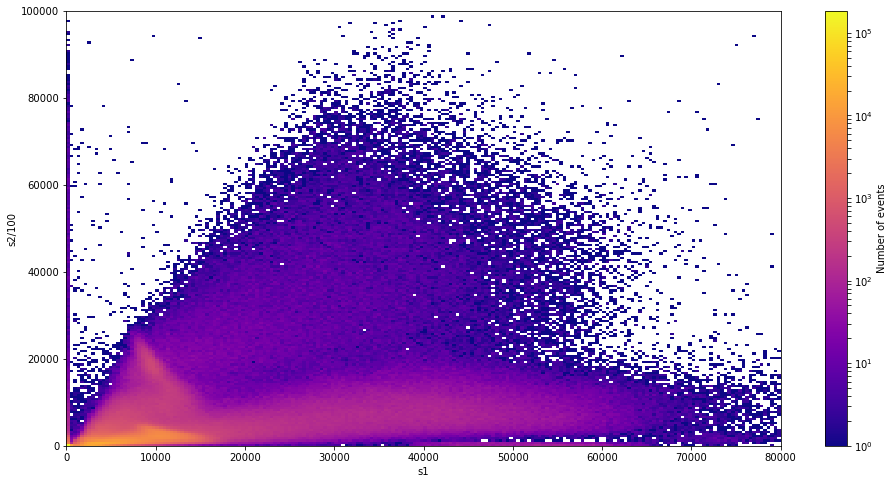

In [13]:
fig = plt.figure(1, figsize=(16,8))
#plt.subplot(121)
plt.hist2d(dataNG_post18836['s1'], 
           dataNG_post18836['s2']/100,
           bins=(200,200), 
           range=((0, 8e4), (0,1e5)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s1')
plt.ylabel('s2/100')

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


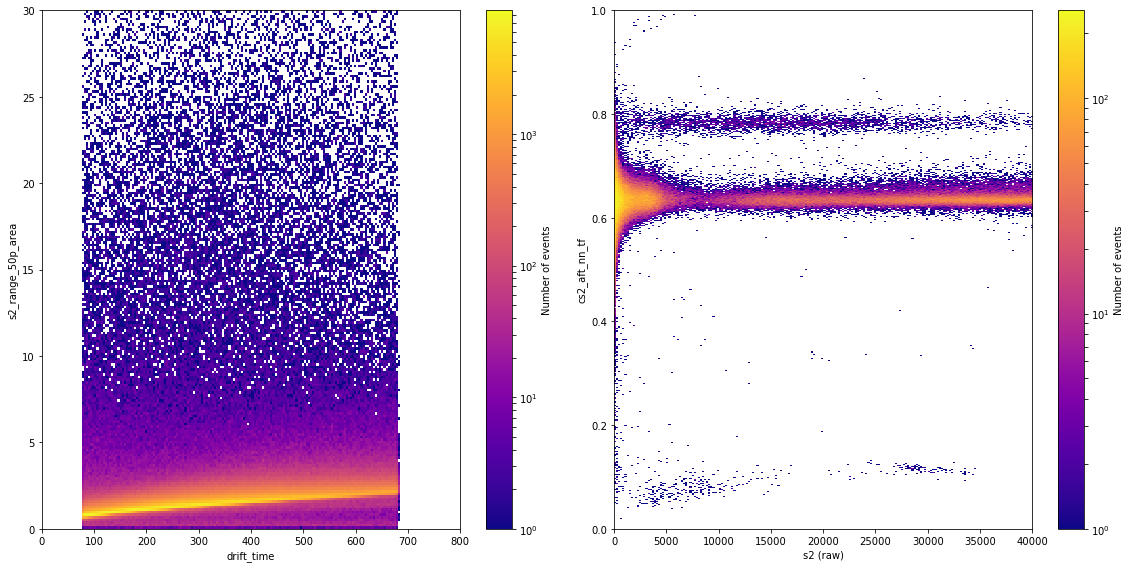

In [14]:
fig = plt.figure(2, figsize=(16,8))
plt.subplot(121)
plt.hist2d(dataNG_post18836['drift_time']/1000, 
           dataNG_post18836['s2_range_50p_area']/1000,
           bins=(200,200), 
           range=((0, 800), (0,30)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('drift_time')
plt.ylabel('s2_range_50p_area')

plt.subplot(122)
plt.hist2d(dataNG_post18836['s2'], 
           dataNG_post18836['cs2_top_nn_tf']/(dataNG_post18836['cs2_top_nn_tf']+dataNG_post18836['cs2_bottom_nn_tf']),
           bins=(200,1000), 
           range=((0, 4e4), (0.0,1.0)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2 (raw)')
plt.ylabel('cs2_aft_nn_tf')

plt.tight_layout()

In [9]:
dataNG_post18836['Cut_s2_range_50p_area'] = (dataNG_post18836['s2_range_50p_area'] < 15e3) & \
                                             (dataNG_post18836['s2_range_50p_area'] > 500)
dataNG_post18836 = hax.cuts.selection(dataNG_post18836, dataNG_post18836['Cut_s2_range_50p_area'] == True)

Unnamed selection: 31754 rows removed (98.29% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


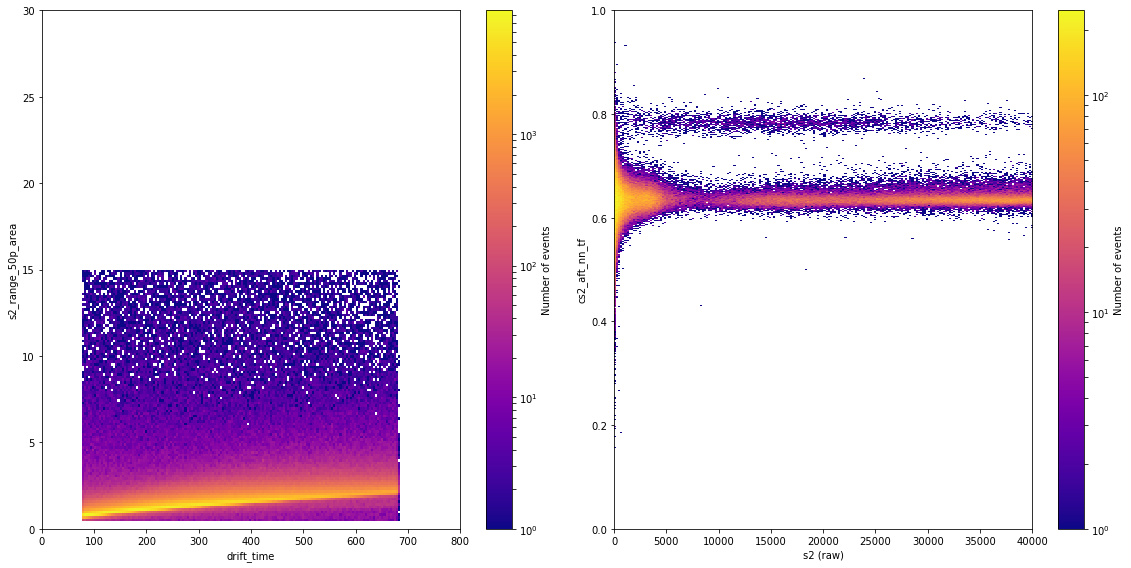

In [16]:
fig = plt.figure(2, figsize=(16,8))
plt.subplot(121)
plt.hist2d(dataNG_post18836['drift_time']/1000, 
           dataNG_post18836['s2_range_50p_area']/1000,
           bins=(200,200), 
           range=((0, 800), (0,30)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('drift_time')
plt.ylabel('s2_range_50p_area')

plt.subplot(122)
plt.hist2d(dataNG_post18836['s2'], 
           dataNG_post18836['cs2_top_nn_tf']/(dataNG_post18836['cs2_top_nn_tf']+dataNG_post18836['cs2_bottom_nn_tf']),
           bins=(200,1000), 
           range=((0, 4e4), (0.0,1.0)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2 (raw)')
plt.ylabel('cs2_aft_nn_tf')

plt.tight_layout()

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


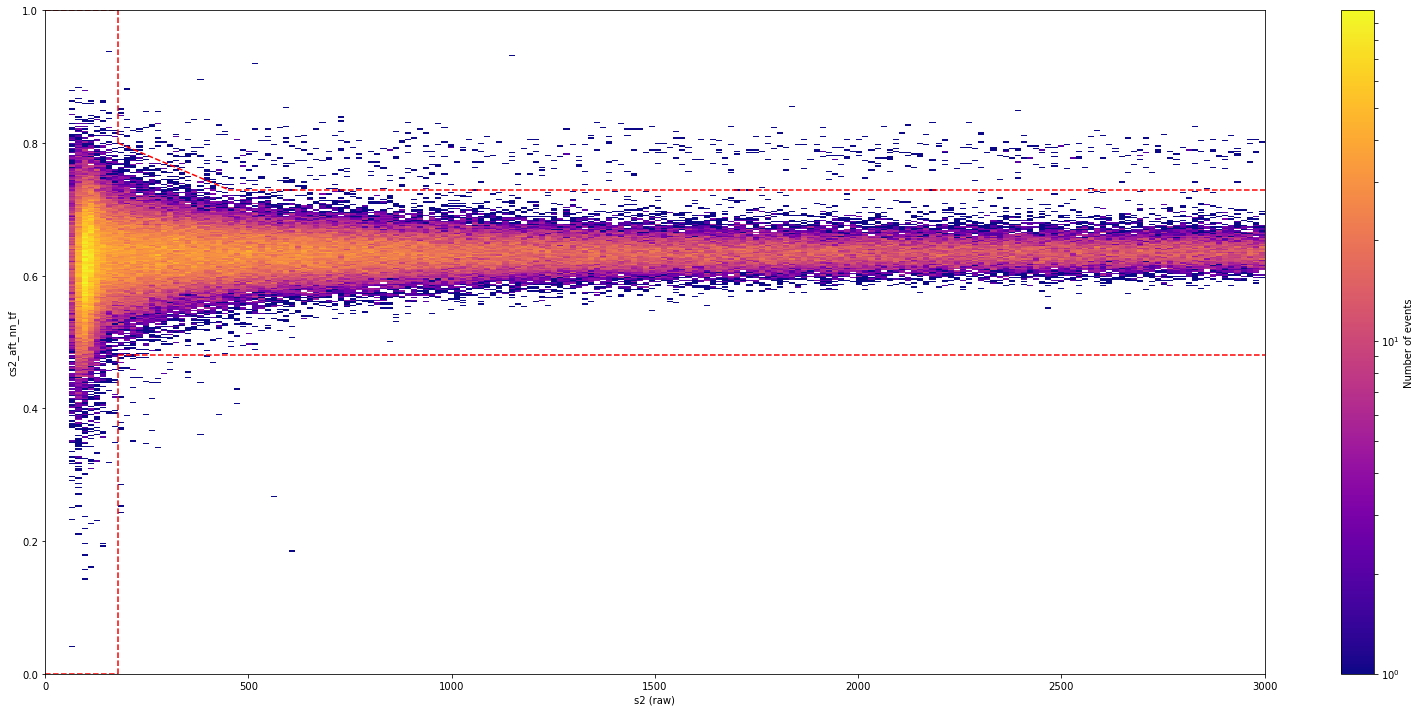

In [13]:
fig = plt.figure(2, figsize=(22,10))
x = np.linspace(180,450,50)
y = -2.59*pow(10,-4)*x+0.84665

plt.hist2d(dataNG_post18836['s2'], 
           dataNG_post18836['cs2_top_nn_tf']/(dataNG_post18836['cs2_top_nn_tf']+dataNG_post18836['cs2_bottom_nn_tf']),
           bins=(200,500), 
           range=((0, 3e3), (0.0,1.0)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2 (raw)')
plt.ylabel('cs2_aft_nn_tf')
#plt.title('Maps')

plt.hlines(y=0.73, xmin=450, xmax=3e3, linestyle = '--', colors='red')
plt.plot(x, y, '--r')
plt.vlines(x=180, ymin=0.8, ymax=1, linestyle = '--', colors='red')
plt.hlines(y=1, xmin=0, xmax=180, linestyle = '--', colors='red')

plt.hlines(y=0.48, xmin=180, xmax=3e3, linestyle = '--', colors='red')
plt.vlines(x=180, ymin=0, ymax=0.48, linestyle = '--', colors='red')
plt.hlines(y=0.0, xmin=0, xmax=180, linestyle = '--', colors='red')
plt.tight_layout()

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


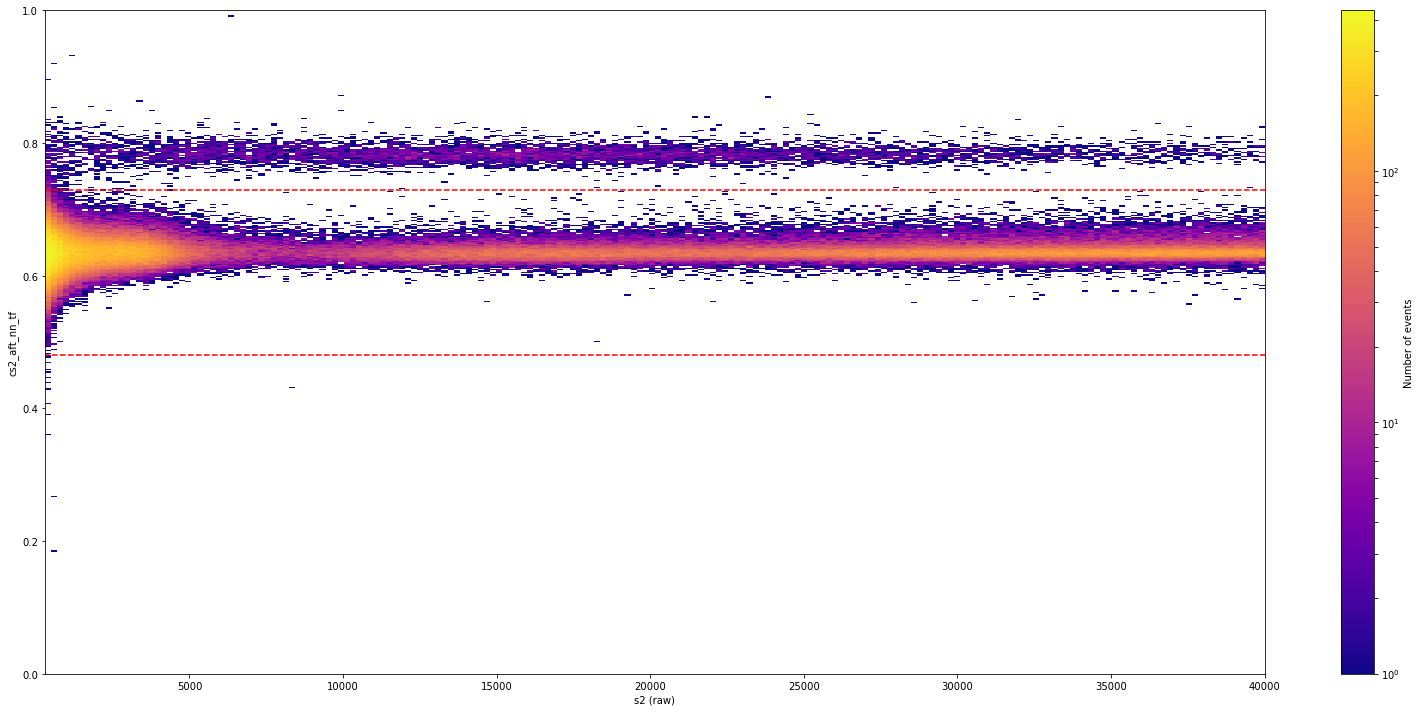

In [14]:
fig = plt.figure(2, figsize=(22,10))
plt.hist2d(dataNG_post18836['s2'], 
           dataNG_post18836['cs2_top_nn_tf']/(dataNG_post18836['cs2_top_nn_tf']+dataNG_post18836['cs2_bottom_nn_tf']),
           bins=(200,500), 
           range=((3e2, 4e4), (0.0,1.0)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2 (raw)')
plt.ylabel('cs2_aft_nn_tf')
#plt.title('Maps')

plt.hlines(y=0.73, xmin=0, xmax=4e4, linestyle = '--', colors='red')
plt.hlines(y=0.48, xmin=0, xmax=4e4, linestyle = '--', colors='red')
plt.tight_layout()

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


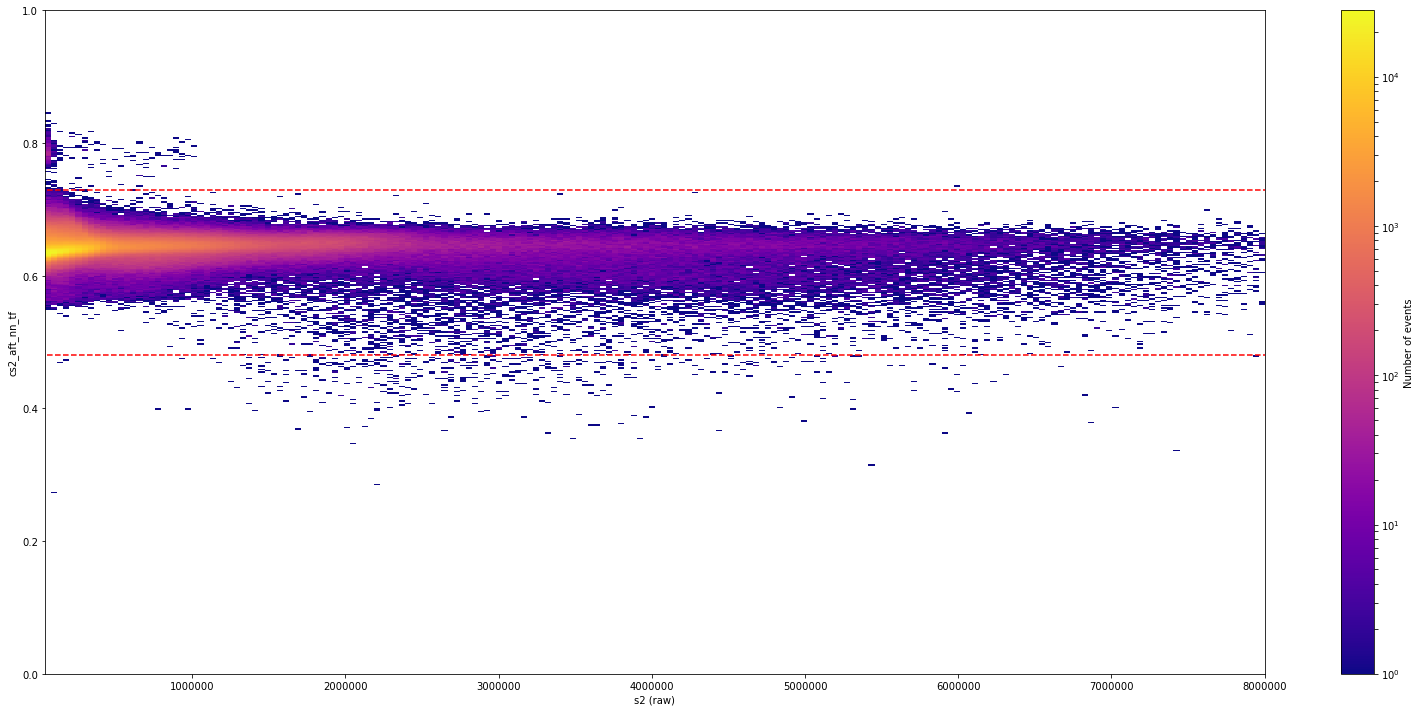

In [15]:
fig = plt.figure(2, figsize=(22,10))
plt.hist2d(dataNG_post18836['s2'], 
           dataNG_post18836['cs2_top_nn_tf']/(dataNG_post18836['cs2_top_nn_tf']+dataNG_post18836['cs2_bottom_nn_tf']),
           bins=(200,500), 
           range=((4e4, 8e6), (0.0,1.0)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2 (raw)')
plt.ylabel('cs2_aft_nn_tf')
#plt.title('Maps')

plt.hlines(y=0.73, xmin=0, xmax=8e6, linestyle = '--', colors='red')
plt.hlines(y=0.48, xmin=0, xmax=8e6, linestyle = '--', colors='red')

plt.tight_layout()

# Avoiding bias

In [19]:
dataNG_post18836['cs2_aft_nn_tf'] = dataNG_post18836['cs2_top_nn_tf']/(dataNG_post18836['cs2_top_nn_tf']+dataNG_post18836['cs2_bottom_nn_tf'])
dataNG_post18836['Cut_bias_sr2'] = (dataNG_post18836['s2']<180) | \
                                  (((dataNG_post18836['s2']>=180) & (dataNG_post18836['s2']<=450)) & \
                                   ((dataNG_post18836['cs2_aft_nn_tf'] < (-2.59*pow(10,-4)*dataNG_post18836['s2']+0.84665)) & \
                                   (dataNG_post18836['cs2_aft_nn_tf'] > 0.48))) | \
                                  ((dataNG_post18836['s2']> 450) & ((dataNG_post18836['cs2_aft_nn_tf'] < 0.73) & \
                                   (dataNG_post18836['cs2_aft_nn_tf'] > 0.48)))

In [20]:
dataNG_post18836_waveform = dataNG_post18836.copy()
dataNG_post18836_waveform = hax.cuts.selection(dataNG_post18836_waveform, dataNG_post18836_waveform['Cut_bias_sr2'] == False)

Unnamed selection: 1819852 rows removed (0.47% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


In [21]:
dataNG_post18836_cut = dataNG_post18836.copy()
dataNG_post18836_cut = hax.cuts.selection(dataNG_post18836_cut, dataNG_post18836_cut['Cut_bias_sr2'] == True)

Unnamed selection: 8633 rows removed (99.53% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


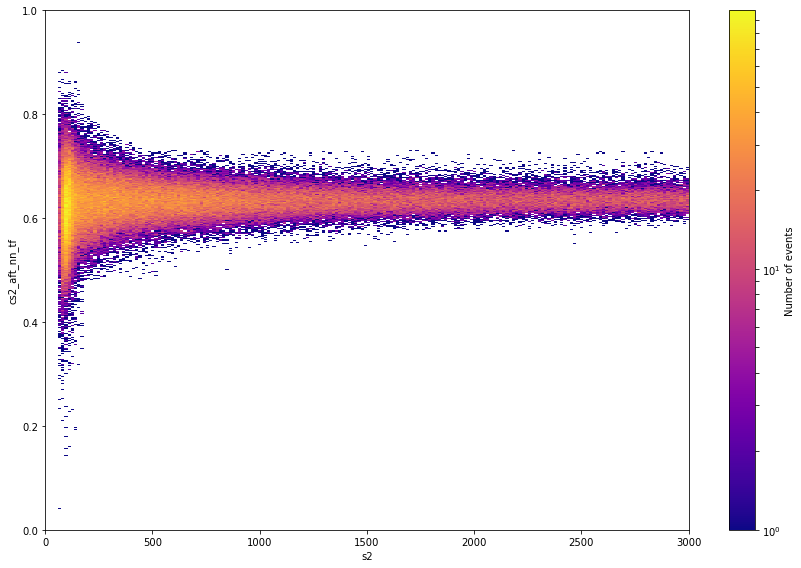

In [22]:
fig = plt.figure(figsize=(12,8))
plt.hist2d(dataNG_post18836_cut['s2'], 
           dataNG_post18836_cut['cs2_aft_nn_tf'],
           bins=(200,500), 
           range=((0, 3e3), (0.0,1.0)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2')
plt.ylabel('cs2_aft_nn_tf')
plt.tight_layout()

dataNG_post18836_cut.to_pickle('/dali/lgrandi/giovo/minitrees/pax_v6.10.1/SR2_dataNG_post18836_after_selection_cs2_aft_nn_tf_pax6.10.1.pkl')

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


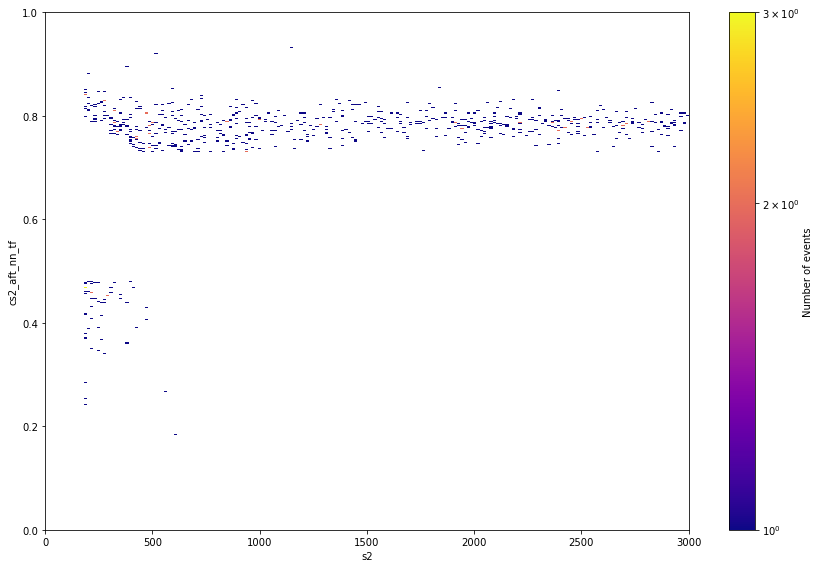

In [25]:
fig = plt.figure(figsize=(12,8))
plt.hist2d(dataNG_post18836_waveform['s2'], 
           dataNG_post18836_waveform['cs2_aft_nn_tf'],
           bins=(200,500), 
           range=((0, 3e3), (0.0,1.0)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2')
plt.ylabel('cs2_aft_nn_tf')
plt.tight_layout()

In [26]:
dataNG_post18836_waveform[['event_number', 'run_number']]

,event_number,run_number
26,257,20634
187,1563,20634
237,1826,20634
475,3901,20634
604,4896,20634
704,5723,20634
1034,8575,20634
1142,9305,20634
1505,12548,20634
1590,13332,20634
